### Example for DNN with the IMDB dataset (including regularization)

In [ ]:
# Dataset composed of review texts from IMBD about movies classified in two classes: positive and negative.
# 25k train reviews + 25k test reviews
# Balanced dataset: 50% positive examples and 50% negative exampoles

Loading the dataset and checking dimensions

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_word: just considering the 10k most common words

print(train_data.shape, test_data.shape)
print(len(train_labels), len(test_labels))
print(train_data[0])
print(train_labels[0])

17464789/17464789 [==============================] - 1s 0us/step
(25000,) (25000,)
25000 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 1

Exploring and pre-processing the dataset

In [35]:
print(max([max(sequence) for sequence in train_data]))

# Reconstruction of the original text
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])
print(decoded_review)

9999
? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life


In [2]:
import numpy as np

# One-hot encoding for the input data
# Each review is represented for the number of words it contains
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Defining the model structure

In [3]:
from tensorflow.keras import models, layers

hidden = 16

model = models.Sequential()
model.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Training the model and plotting errors along the process

In [4]:
# Takes the validation set and gives us the score for the training set and for the dev set that is not being used, so it can show us if we are entering in overfitting.

In [5]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Partitioning the training and dev set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 11s 298ms/step - loss: 0.5329 - acc: 0.7881 - val_loss: 0.4338 - val_acc: 0.8343
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3399 - acc: 0.8909 - val_loss: 0.3430 - val_acc: 0.8632
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2577 - acc: 0.9144 - val_loss: 0.2944 - val_acc: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2096 - acc: 0.9291 - val_loss: 0.2880 - val_acc: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1789 - acc: 0.9407 - val_loss: 0.2805 - val_acc: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1507 - acc: 0.9510 - val_loss: 0.2838 - val_acc: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1344 - acc: 0.9558 - val_loss: 0.2920 - val_acc: 0.8844
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1157 -

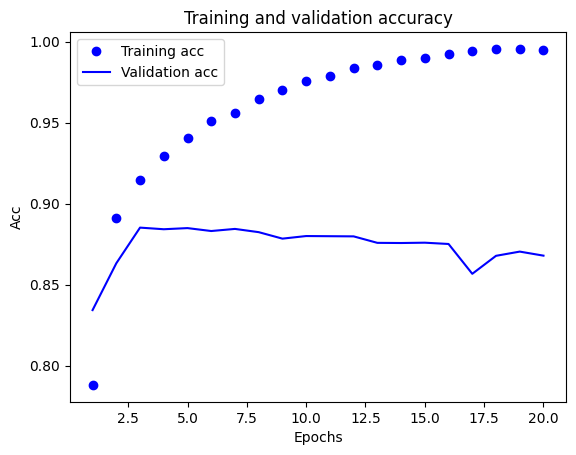

In [7]:
# Creates a history dictionary with the values for accuracy of the training and validation
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

# Creates a plot to consider the values of the accuracy for the training anda validation along the epochs
import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc') # as dots
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') # as line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

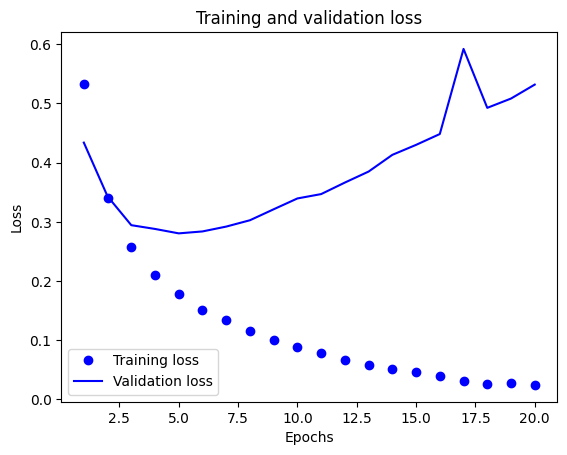

In [8]:
# Same theory now for the loss function values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Predicting for the test set and calculating errors

In [41]:
preds = model.predict(x_test) # Predicts the probability for each class
class_preds = preds > 0.5 # stores classes with prediction with probability above 50%

print(preds[0:5])
class_preds[0:5]

[[0.00470701]
 [1.        ]
 [0.4727728 ]
 [0.83019215]
 [0.9846341 ]]


array([[False],
       [ True],
       [False],
       [ True],
       [ True]])

In [9]:
results = model.evaluate(x_test, y_test, verbose= 0)
print(results)

[0.5735325217247009, 0.8577600121498108]
